<a href="https://colab.research.google.com/github/Desmondonam/Lung_cancer_Prediction/blob/main/Copy_of_EDA_Lungcancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/Desmondonam/Lung_cancer_Prediction/main/Data1/nlst_780_prsn_idc_20210527.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


## Number of patients according to race


In [4]:
#df.info()

# convert race to categorical
df['race'] = pd.Categorical(df.race)
#df.dtypes

# after which we can now count the observations according to the different races
# create a group using groupby
group = df.groupby(["race"])['race'].count()

race_df = group.reset_index(name='count')
#race_df.dtypes
type(race_df)


pandas.core.frame.DataFrame


Replace codes with the values as per the data description


In [5]:
race_df['race'] = race_df['race'].replace([1, 2, 3,4,5,6,7,95,96,98,99],
 ['White', 'Black/African-American', 'Asian','American Indian/Alaskan Native','Native Hawaiian/other Pacific Island',
  'More than one race','Participant refused to answer','Missing data form','Missing-No response','Missing-answer left blank','Unknown'])

race_df

,race,count
0,White,48549
1,Black/African-American,2376
2,Asian,1095
3,American Indian/Alaskan Native,190
4,Native Hawaiian/other Pacific Island,193
5,More than one race,679
6,Participant refused to answer,109
7,Missing data form,175
8,Missing-No response,3
9,Missing-answer left blank,2


Visualize


In [6]:


long_df = px.data.medals_long()

fig = px.bar(race_df, x="race", y="count",  title="Number of patients according to Race")
fig.show()


Turns out most patients were of white race

## Smoking status



In [7]:

# convert cigsmok to categorical
df['cigsmok'] = pd.Categorical(df.cigsmok)

# after which we can now count the observations according to the cigarette smoking status
# create a group using groupby
group = df.groupby(["cigsmok"])['cigsmok'].count()

smok_df = group.reset_index(name='count')
smok_df

,cigsmok,count
0,0,27692
1,1,25760


In [8]:
smok_df['cigsmok'] = smok_df['cigsmok'].replace([0, 1],
 ['Former', 'Current'])

smok_df

,cigsmok,count
0,Former,27692
1,Current,25760


In [9]:

fig_cigsmok = px.bar(smok_df, x="cigsmok", y="count",  title="Number of patients according to Cigarette smoking status")
fig_cigsmok.show()


Former cigarette smokers were slightly more than those who are currently smoking

## Gender


In [10]:
# convert gender to categorical
df['gender'] = pd.Categorical(df.gender)

# after which we can now count the observations according to the gender
# create a group using groupby
group = df.groupby(["gender"])['gender'].count()

gender_df = group.reset_index(name='count')
gender_df

,gender,count
0,1,31530
1,2,21922


In [11]:
gender_df['gender'] = gender_df['gender'].replace([1, 2],
 ['Male', 'Female'])

gender_df


,gender,count
0,Male,31530
1,Female,21922


In [12]:
fig_gender = px.bar(gender_df, x="gender", y="count",  title="Number of patients by gender")
fig_gender.show()


We had more male patients as compared to females


## Age distribution

In [13]:
# select age


In [14]:

fig_age = px.histogram(df, x="age",title="Distribution of Age")
fig_age.show()

Seeing that we have very few records with patients with age less than 55, we'll drop those as they disfigure the distribution

In [15]:
fig_age2 = px.histogram(df[df['age']>=55], x="age",title="Distribution of Age")
fig_age2.show()

The distribution is skewed to the left, most patients were of age between 55 - 60 years

## Lessions EDA

Days since randomization at time of screening

In [16]:
df.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


In [17]:
# convert time randomization to categorical
df['scr_days0'] = pd.Categorical(df.scr_days0)

In [18]:
# create a group using groupby
group = df.groupby(["scr_days0"])['scr_days0'].count()

scr_days0_df = group.reset_index(name='count')
scr_days0_df

,scr_days0,count
0,-4.0,1
1,0.0,25856
2,1.0,262
3,2.0,150
4,3.0,196
...,...,...
278,320.0,1
279,324.0,1
280,325.0,2
281,328.0,1


In [19]:
fig_random = px.bar(scr_days0_df, x="scr_days0", y="count",  title="Number of days since randomization ")
fig_random.show()

## Lung cancer grade

In [20]:
# convert cancer grade to categorical
df['de_grade'] = pd.Categorical(df.de_grade)

# after which we can now count the observations according to the cancer grade
# create a group using groupby
group = df.groupby(["de_grade"])['de_grade'].count()

de_grade_df = group.reset_index(name='count')
de_grade_df

,de_grade,count
0,1.0,225
1,2.0,171
2,3.0,458
3,4.0,593
4,5.0,107
5,6.0,199
6,8.0,53
7,9.0,252


In [21]:
de_grade_df['de_grade'] = de_grade_df['de_grade'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0],
 ['Grade Cannot Be Assessed (GX) ', 'Well Differentiated (G1)', 'Moderately Differentiated (G2)', 'Poorly Differentiated (G3)', 'Undifferentiated (G4)', 'Unspecified in Pathology Report',
  'Unknown', 'Missing'])
de_grade_df

,de_grade,count
0,Grade Cannot Be Assessed (GX),225
1,Well Differentiated (G1),171
2,Moderately Differentiated (G2),458
3,Poorly Differentiated (G3),593
4,Undifferentiated (G4),107
5,Unspecified in Pathology Report,199
6,Unknown,53
7,Missing,252


In [24]:
fig_de_grade = px.bar(de_grade_df, x="de_grade", y="count",  title="Number of patients according to Lung cancer grade")
fig_de_grade.show()

Plot of lession size vs age

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


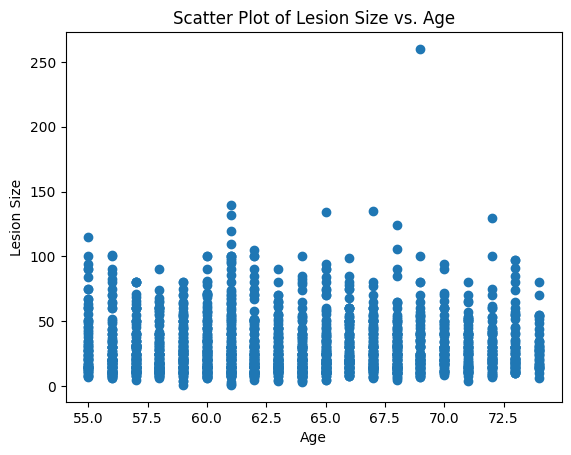

In [29]:
plt.scatter(df['age'], df['lesionsize'])
plt.xlabel('Age')
plt.ylabel('Lesion Size')
plt.title('Scatter Plot of Lesion Size vs. Age')
plt.show()

The sizes of the lessions are smaller across all the ages as seen

## heatmap and a correlation matrix

<ipython-input-32-6738a2a74998>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



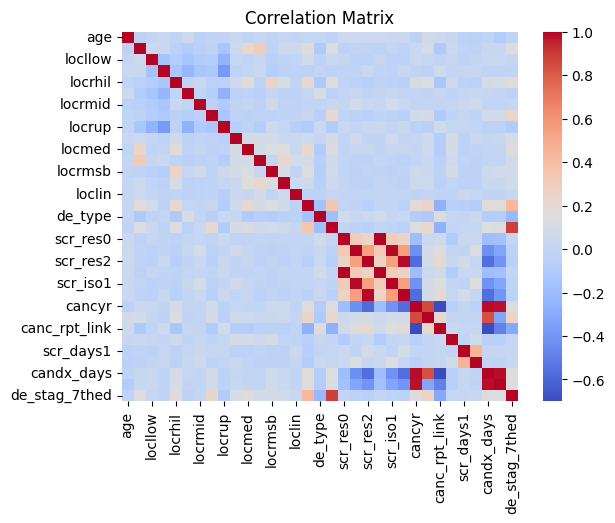

In [32]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Screen result associated with the first confirmed lung cancer diagnosis

In [36]:
# convert cancer creen result to categorical
df['can_scr'] = pd.Categorical(df.can_scr)

# after which we can now count the observations according to the cancer screen result
# create a group using groupby
group = df.groupby(["can_scr"])['can_scr'].count()

can_scr_df = group.reset_index(name='count')

In [37]:
can_scr_df['can_scr'] = can_scr_df['can_scr'].replace([0, 1, 2, 3, 4],
 ['No Cancer', 'Positive Screen', 'Negative Screen', 'Missed Screen', 'Post Screening'])

can_scr_df

,can_scr,count
0,No Cancer,51394
1,Positive Screen,928
2,Negative Screen,181
3,Missed Screen,82
4,Post Screening,867


In [38]:
fig_can_scr = px.bar(can_scr_df, x="can_scr", y="count",  title="Number of patients by screen results")
fig_can_scr.show()

As seen here, there are many of the patients who did not have cancer on the screening results

# Feature Extraction


In [33]:
## Import the other libraries that will be needed for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# the data I have is
df.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


In [35]:
## Target Variable
df['can_scr']

0        0
1        0
2        0
3        0
4        0
        ..
53447    0
53448    0
53449    0
53450    0
53451    0
Name: can_scr, Length: 53452, dtype: int64